In [3]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,Flatten

In [4]:
x_path = r'/content/X_categories.pickle'
y_path = r'/content/y_labels.pickle'

In [5]:
with open(x_path,'rb') as file:
    X_data = pickle.load(file)

with open(y_path,'rb') as file:
    Y_data = pickle.load(file)

<Axes: xlabel='count'>

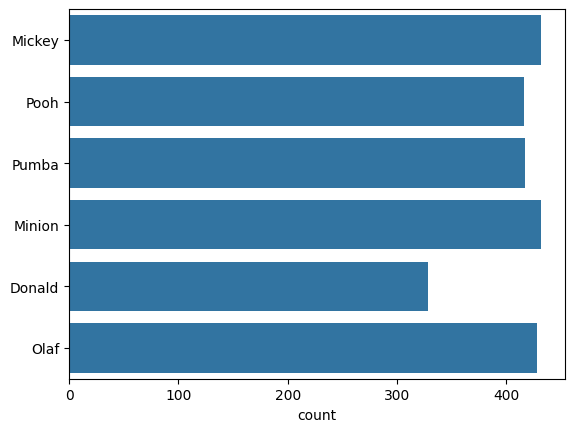

In [6]:
mappings = {0:'Donald',1:'Mickey',2:'Minion',3:'Olaf',4:'Pooh',5:'Pumba'}
Y_data_count = pd.Series(Y_data)
img_count = Y_data_count.map(mappings)
sns.countplot(img_count)

In [7]:
X_data[0].shape

(224, 224, 3)

In [8]:
X_data.shape[0]

2453

In [15]:
X_train = X_data.reshape(X_data.shape[0],224,224,3)

In [10]:
Y_train = to_categorical(Y_data,num_classes=6)

In [17]:
cnn = Sequential([Conv2D(50,(2,2),activation='relu',input_shape=(224,224,3)),
                  MaxPooling2D(2,2),
                  Conv2D(50,(2,2),activation='relu',input_shape=(224,224,3)),
                  MaxPooling2D(2,2),
                  Flatten(),
                  Dense(20,activation='relu'),
                  Dense(40,activation='relu'),
                  Dense(6,activation='softmax')])

In [18]:
cnn.compile(optimizer='adam',
            loss="categorical_crossentropy",
            metrics=['accuracy','precision', 'recall'])

In [27]:
cnn.fit(X_train, Y_train,epochs=10)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8918 - loss: 0.3617 - precision: 0.8962 - recall: 0.8909
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9160 - loss: 0.3251 - precision: 0.9192 - recall: 0.9156
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9036 - loss: 0.3337 - precision: 0.9098 - recall: 0.8990
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9195 - loss: 0.3037 - precision: 0.9254 - recall: 0.9151
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9131 - loss: 0.3022 - precision: 0.9161 - recall: 0.9114
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9289 - loss: 0.2689 - precision: 0.9311 - recall: 0.9265
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9426 - loss: 0.2395 - precision: 0.9474 - recall: 0.9426
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9370 - loss: 0.2376 - precision: 0.9405 - recall: 0.9345
Epoch 9/10
77/77 ━━━━━━━

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
a = X_data[1].reshape(1,224,224,3)
prediction = cnn.predict(a)
mappings[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


'Pooh'

In [29]:
cnn.save('model.keras')